In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# prepare data for the analysis
df = pd.read_csv('processed_data/team_games_features.csv')
df = df[df['season'] != 20252026]
# df = df[df['is_away']]
dist_bins = [0, 250, 500, 750, 1000, 1250, 1500, 2000, 3000, 5000, np.inf]

df['dist_bin'] = pd.cut(df['distance'], bins=dist_bins, right=False)
df['dist_bin_midpoint'] = df['dist_bin'].apply(lambda x: (x.left + x.right) / 2)

#check count of each bin
bin_counts = df['dist_bin'].value_counts().sort_index()
print(bin_counts)
display(df.head())

dist_bin
[0.0, 250.0)        2801
[250.0, 500.0)       999
[500.0, 750.0)      1097
[750.0, 1000.0)      677
[1000.0, 1250.0)     428
[1250.0, 1500.0)     391
[1500.0, 2000.0)     590
[2000.0, 3000.0)     517
[3000.0, 5000.0)     360
[5000.0, inf)         12
Name: count, dtype: int64


,Unnamed: 0,game_id,season,game_date,game_type,venue,venue_utc_offest,home_team_id,away_team_id,home_team_abbrev,...,game_result,goal_difference,venue_lat_prev,venue_lon_prev,distance,consecutive_away_games,rest_days,back_to_back,dist_bin,dist_bin_midpoint
0,3936,2022020009,20222023,2022-10-12,2,Honda Center,-07:00,24,55,ANA,...,win,1.0,33.807778,-117.876667,0.000000,0,0.0,True,"[0.0, 250.0)",125.0
1,9185,2022020032,20222023,2022-10-15,2,UBS Arena,-04:00,2,24,NYI,...,loss,-6.0,33.807778,-117.876667,3939.487266,1,2.0,False,"[3000.0, 5000.0)",4000.0
2,9186,2022020039,20222023,2022-10-17,2,Madison Square Garden,-04:00,3,24,NYR,...,loss,-2.0,40.712094,-73.727157,22.855389,2,1.0,False,"[0.0, 250.0)",125.0
3,9187,2022020048,20222023,2022-10-18,2,Prudential Center,-04:00,1,24,NJD,...,loss,-2.0,40.750556,-73.993611,15.072150,3,0.0,True,"[0.0, 250.0)",125.0
4,9188,2022020059,20222023,2022-10-20,2,TD Garden,-04:00,6,24,BOS,...,loss,-1.0,40.733611,-74.171111,316.017150,4,1.0,False,"[250.0, 500.0)",375.0


### Start exploring the data

### On average, do away teams lose more than home teams?

,season,is_away,win_rate
0,20222023,False,0.523628
1,20222023,True,0.476372
2,20232024,False,0.541159
3,20232024,True,0.458841
4,20242025,False,0.562500
5,20242025,True,0.437500


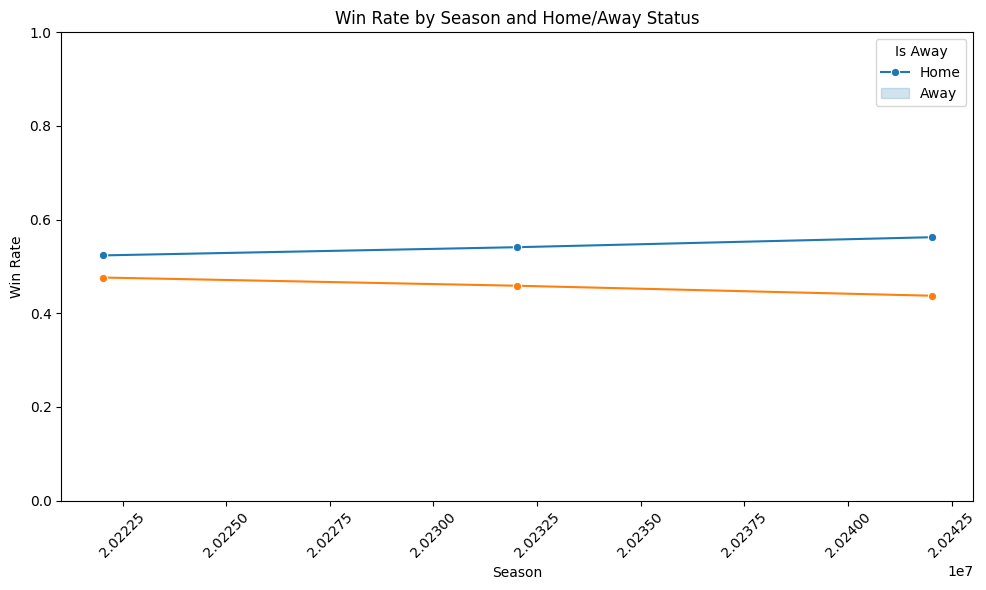

In [359]:
g = df.copy()

grouped = g.groupby(['season', 'is_away'])['game_result'].apply(lambda s: (s == 'win').mean())
# melt
grouped = grouped.reset_index()
grouped = grouped.rename(columns={'game_result': 'win_rate'})

grouped.to_clipboard()

display(grouped)

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='season', y='win_rate', hue='is_away', marker='o')
plt.title('Win Rate by Season and Home/Away Status')
plt.xlabel('Season')
plt.ylabel('Win Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Is Away', labels=['Home', 'Away'])
plt.tight_layout()
plt.show()

### Distance traveled by team

Index(['Unnamed: 0', 'game_id', 'season', 'game_date', 'game_type', 'venue',
       'venue_utc_offest', 'home_team_id', 'away_team_id', 'home_team_abbrev',
       'away_team_abbrev', 'home_team_score', 'away_team_score',
       'start_time_utc', 'winner_abbrev', 'loser_abbrev', 'goal_diff',
       'venue_team', 'League', 'Division', 'venue_lat', 'venue_lon', 'team',
       'goals_for', 'goals_against', 'is_away', 'game_result',
       'goal_difference', 'venue_lat_prev', 'venue_lon_prev', 'distance',
       'consecutive_away_games', 'rest_days', 'back_to_back', 'dist_bin',
       'dist_bin_midpoint'],
      dtype='object')


,Unnamed: 0,game_id,season,game_date,game_type,venue,venue_utc_offest,home_team_id,away_team_id,home_team_abbrev,...,game_result,goal_difference,venue_lat_prev,venue_lon_prev,distance,consecutive_away_games,rest_days,back_to_back,dist_bin,dist_bin_midpoint
0,3936,2022020009,20222023,2022-10-12,2,Honda Center,-07:00,24,55,ANA,...,win,1.0,33.807778,-117.876667,0.000000,0,0.0,True,"[0.0, 250.0)",125.0
1,9185,2022020032,20222023,2022-10-15,2,UBS Arena,-04:00,2,24,NYI,...,loss,-6.0,33.807778,-117.876667,3939.487266,1,2.0,False,"[3000.0, 5000.0)",4000.0
2,9186,2022020039,20222023,2022-10-17,2,Madison Square Garden,-04:00,3,24,NYR,...,loss,-2.0,40.712094,-73.727157,22.855389,2,1.0,False,"[0.0, 250.0)",125.0
3,9187,2022020048,20222023,2022-10-18,2,Prudential Center,-04:00,1,24,NJD,...,loss,-2.0,40.750556,-73.993611,15.072150,3,0.0,True,"[0.0, 250.0)",125.0
4,9188,2022020059,20222023,2022-10-20,2,TD Garden,-04:00,6,24,BOS,...,loss,-1.0,40.733611,-74.171111,316.017150,4,1.0,False,"[250.0, 500.0)",375.0


,season,team,distance
72,20242025,DAL,90091.216179
75,20242025,FLA,82236.209404
64,20242025,ANA,81436.186861
74,20242025,EDM,80360.990972
91,20242025,UTA,78319.423135
...,...,...,...
27,20222023,TOR,55678.831510
22,20222023,PIT,55497.072971
3,20222023,BUF,54968.951205
15,20222023,MTL,54965.538741


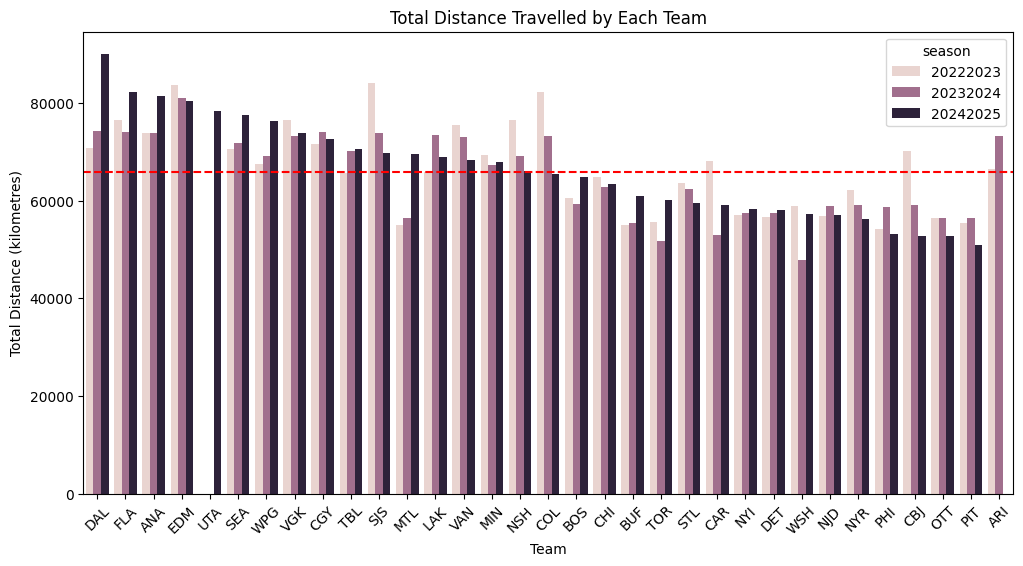

In [331]:
print(df.columns)
display(df.head())

# df = df[df['is_away']]
grouped = df.groupby(['season', 'team'])['distance'].sum().reset_index()
grouped = grouped.sort_values(by=['season', 'distance'], ascending=False)
display(grouped)
# create a graph for the data (include average line)
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='team', y='distance', hue='season')
plt.title('Total Distance Travelled by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Distance (kilometres)')
average_distance = grouped['distance'].mean()
plt.axhline(average_distance, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()


Some observations:

- It seems like the east coast teams in the metropolitan division travel the least

In [332]:
# create a mapping of teams and their respective conference

copy = df.copy()
copy['Conference'] = np.where(copy['Division'].isin(['Atlantic', 'Metropolitan']), 'East', 'West')
copy = copy[copy['home_team_abbrev'] == copy['team']]
copy = copy[['team', 'Conference']].drop_duplicates()

display(copy)

,team,Conference
0,ANA,West
88,ARI,West
165,BOS,East
246,BUF,East
328,CAR,East
411,CBJ,East
492,CGY,West
577,CHI,West
656,COL,West
739,DAL,West


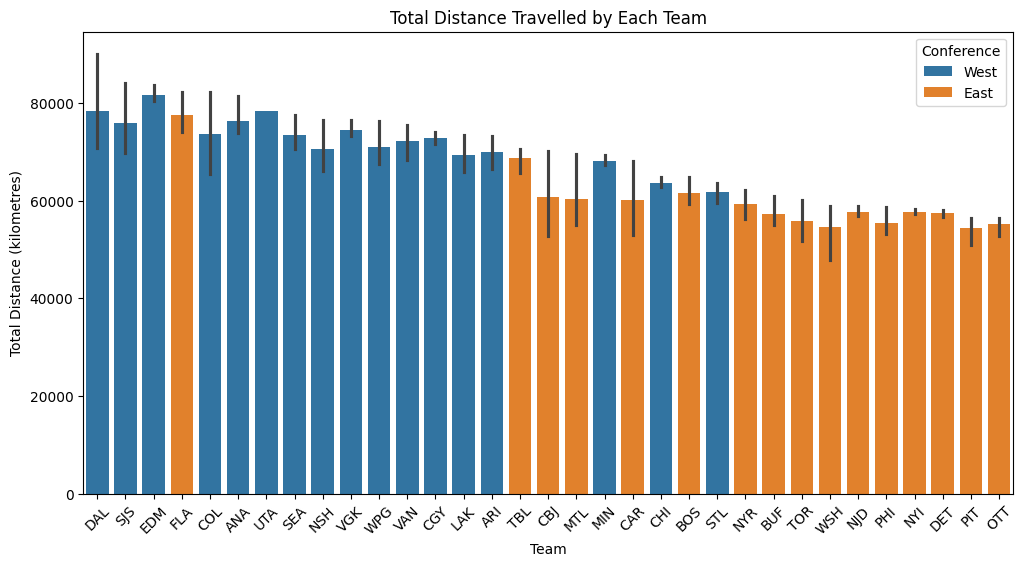

average total distance traveled by teams in the same conference:


,season,Conference,distance
0,20222023,East,60250.296219
1,20222023,West,72678.213775
2,20232024,East,58215.948499
3,20232024,West,71588.686262
4,20242025,East,60247.014854
5,20242025,West,72461.484993


In [333]:
conference_analysis_df = df.merge(copy, on='team', how='left')
# now do analysis
conference_group = conference_analysis_df.groupby(['season', 'team','Conference'])['distance'].sum().reset_index()
conference_group = conference_group.sort_values(by='distance', ascending=False)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(data=conference_group, x='team', y='distance', hue='Conference', dodge=False)
plt.title('Total Distance Travelled by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Distance (kilometres)')
plt.xticks(rotation=45)
plt.legend(title='Conference')  # Ensures legend is shown and labeled
plt.show()

print('average total distance traveled by teams in the same conference:')
display(conference_group.groupby(['season', 'Conference'])['distance'].mean().reset_index())


Finding: on average, an eastern team travel ~12,000 kilometres less than a western team in a single season (2024-2025)

Additionally, it looks like the schedule makers are fairly consistent since the average distance traveled for each team per conference is very similar year over year.

In [334]:
wins_analysis = df.copy()
wins_analysis = wins_analysis[wins_analysis['is_away']]

wins_analysis = wins_analysis.groupby(['season', 'game_result'])['distance'].mean().reset_index()
display(wins_analysis)

,season,game_result,distance
0,20222023,loss,1001.015889
1,20222023,win,1058.984258
2,20232024,loss,1039.447579
3,20232024,win,986.585169
4,20242025,loss,1004.142947
5,20242025,win,1064.401931


### Which team handled travel best? Total points / distance traveled

,index,season,team,distance,points,winPctg,points / distance
0,72,20242025,DAL,90091.216179,106,0.609756,0.001177
1,75,20242025,FLA,82236.209404,98,0.573171,0.001192
2,64,20242025,ANA,81436.186861,80,0.426829,0.000982
3,74,20242025,EDM,80360.990972,101,0.585366,0.001257
4,91,20242025,UTA,78319.423135,89,0.463415,0.001136
...,...,...,...,...,...,...,...
91,27,20222023,TOR,55678.831510,111,0.609756,0.001994
92,22,20222023,PIT,55497.072971,91,0.487805,0.001640
93,3,20222023,BUF,54968.951205,91,0.512195,0.001655
94,15,20222023,MTL,54965.538741,68,0.378049,0.001237


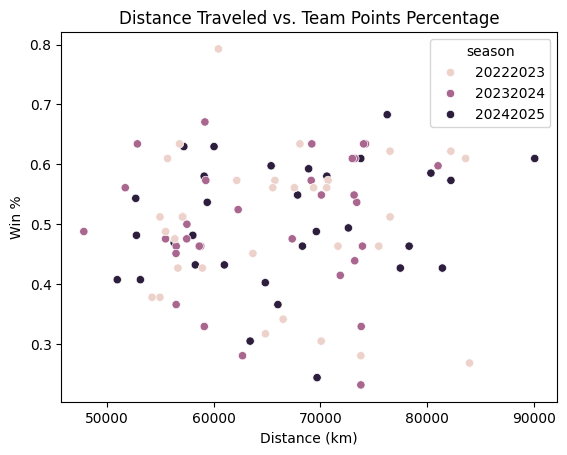

In [335]:

standings_df = pd.read_csv('processed_data/nhl_standings_merged.csv')

# display(standings_df)

team_points_df = standings_df[['team', 'points', 'season', 'winPctg']].copy()
distance_df = grouped.reset_index()
# overall, did teams perform worse when they had more travel distance?

distances_and_points_df = distance_df.merge(team_points_df, on=['team', 'season'], how='left')
distances_and_points_df.sort_values(by='points / distance', ascending=False)
# normalize
display(distances_and_points_df)


sns.scatterplot(data=distances_and_points_df, x='distance', y='winPctg', hue='season')
# Add labels for each team
# for i, row in distances_and_points_df.iterrows():
#     plt.text(row['distance'], row['winPctg'], row['team'], fontsize=8, ha='right', va='bottom')

# sns.regplot(
#     data=distances_and_points_df,
#     x='distance',
#     y='winPctg',
#     scatter=False,
#     color='red',
#     # line_kws={'color': 'red'}
# )

plt.title('Distance Traveled vs. Team Points Percentage')
plt.xlabel('Distance (km)')
plt.ylabel('Win %')
plt.show()

### More granular

individual game traveled vs. game result

/var/folders/_z/1h8m2g3x1cgc41srwzsqjr900000gn/T/ipykernel_42461/2589858611.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_grouped = g.groupby('dist_bin_midpoint')['game_result'].apply(lambda s: (s == 'win').mean()).reset_index()


,dist_bin_midpoint,game_result
0,125.0,0.469163
1,375.0,0.442257
2,625.0,0.471483
3,875.0,0.434000
4,1125.0,0.454849
5,1375.0,0.462121
6,1750.0,0.454802
7,2500.0,0.453333
8,4000.0,0.500000
9,inf,0.500000


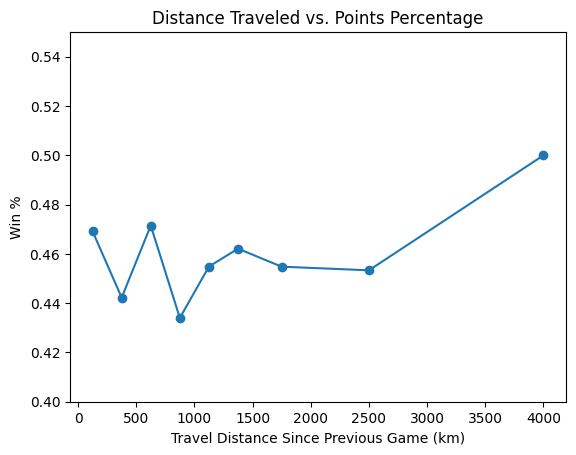

In [336]:
g = df.copy()
g = g[g['is_away']]
distance_grouped = g.groupby('dist_bin_midpoint')['game_result'].apply(lambda s: (s == 'win').mean()).reset_index()
distance_counts = g['dist_bin_midpoint'].value_counts().sort_index()

# print(distance_counts)
display(distance_grouped)


plt.plot(distance_grouped['dist_bin_midpoint'], distance_grouped['game_result'], marker='o')
# plt.ylim(distance_grouped['game_result'].min(), distance_grouped['game_result'].max())
plt.title('Distance Traveled vs. Points Percentage')
plt.xlabel('Travel Distance Since Previous Game (km)')
plt.ylabel('Win %')
plt.ylim(0.4, 0.55)
plt.show()

### How did rest days effect the travelling team's win %?

rest_clipped
0.0     846
1.0    2145
2.0     705
3.0     141
4.0      40
5.0      59
Name: count, dtype: int64

rest_clipped
0.0    0.410165
1.0    0.463869
2.0    0.483688
3.0    0.475177
4.0    0.475000
5.0    0.542373
Name: game_result, dtype: float64

3936


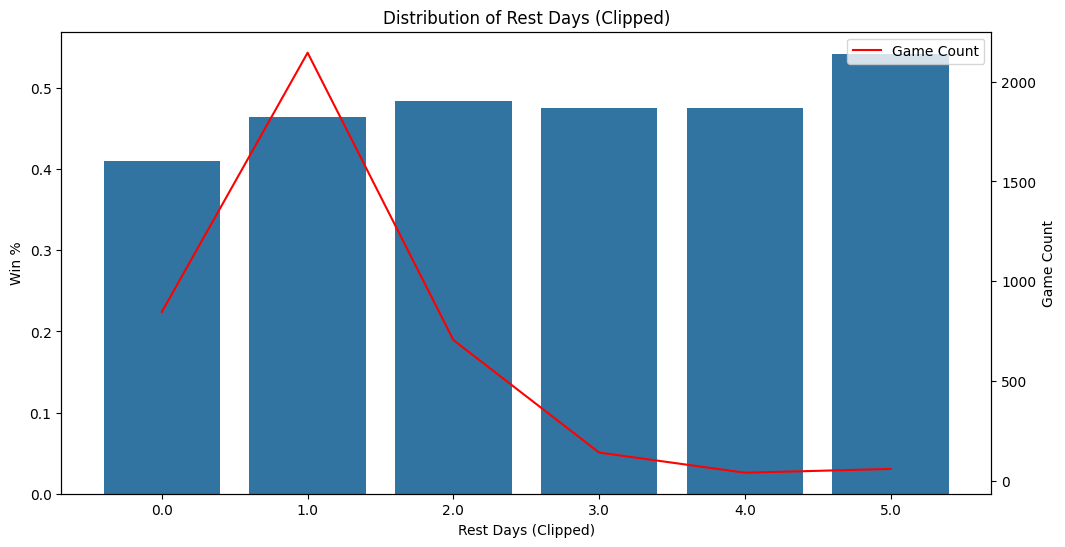

In [337]:
g = df.copy()
# g = g[g['season'] == 20232025]
g = g[g['is_away']]
g['rest_clipped'] = g['rest_days'].clip(0,5) # exclude super long breaks (all-star week)
win_pct = g.groupby('rest_clipped')['game_result'].apply(lambda s:(s=='win').mean()) # gets the win percentage for each group

counts = g['rest_clipped'].value_counts().sort_index()
display(counts) # counts the number of games in each group
# g = g.sort_values()
display(win_pct)

print(sum(counts))


# plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x=win_pct.index, y=win_pct.values, ax=ax1)
plt.title('Distribution of Rest Days (Clipped)')
plt.xlabel('Rest Days (Clipped)')
plt.ylabel('Win %')
ax2 = ax1.twinx()
sns.lineplot(x=counts.index, y=counts.values, color='red', label='Game Count', ax=ax2)
ax2.set_ylabel('Game Count')
plt.show()


rest_clipped
0.0     417
1.0    2371
2.0     819
3.0     206
4.0      56
5.0      67
Name: count, dtype: int64

,Unnamed: 0,game_id,season,game_date,game_type,venue,venue_utc_offest,home_team_id,away_team_id,home_team_abbrev,...,goal_difference,venue_lat_prev,venue_lon_prev,distance,consecutive_away_games,rest_days,back_to_back,dist_bin,dist_bin_midpoint,rest_clipped
0,3936,2022020009,20222023,2022-10-12,2,Honda Center,-07:00,24,55,ANA,...,1.0,33.807778,-117.876667,0.000000,0,0.0,True,"[0.0, 250.0)",125.0,0.0
6,3942,2022020110,20222023,2022-10-26,2,Honda Center,-07:00,24,14,ANA,...,-2.0,42.341111,-83.055000,3167.236844,0,2.0,False,"[3000.0, 5000.0)",4000.0,2.0
8,3944,2022020142,20222023,2022-10-30,2,Honda Center,-07:00,24,10,ANA,...,1.0,36.102778,-115.178333,354.362774,0,1.0,False,"[250.0, 500.0)",375.0,1.0
12,3948,2022020192,20222023,2022-11-06,2,Honda Center,-08:00,24,13,ANA,...,-2.0,37.332778,-121.901111,534.792392,0,0.0,True,"[500.0, 750.0)",625.0,0.0
13,3949,2022020210,20222023,2022-11-09,2,Honda Center,-08:00,24,30,ANA,...,-3.0,33.807778,-117.876667,0.000000,0,2.0,False,"[0.0, 250.0)",125.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,803,2024021110,20242025,2025-03-22,2,Capital One Arena,-04:00,15,13,WSH,...,3.0,38.898200,-77.020900,0.000000,0,1.0,False,"[0.0, 250.0)",125.0,1.0
7862,229,2024021171,20242025,2025-03-30,2,Capital One Arena,-04:00,15,7,WSH,...,-3.0,44.944722,-93.101111,1487.014929,0,2.0,False,"[1250.0, 1500.0)",1375.0,2.0
7865,514,2024021207,20242025,2025-04-04,2,Capital One Arena,-04:00,15,16,WSH,...,2.0,35.803333,-78.721944,375.526746,0,1.0,False,"[250.0, 500.0)",375.0,1.0
7867,307,2024021252,20242025,2025-04-10,2,Capital One Arena,-04:00,15,12,WSH,...,1.0,40.712094,-73.727157,346.144210,0,3.0,False,"[250.0, 500.0)",375.0,3.0


3936


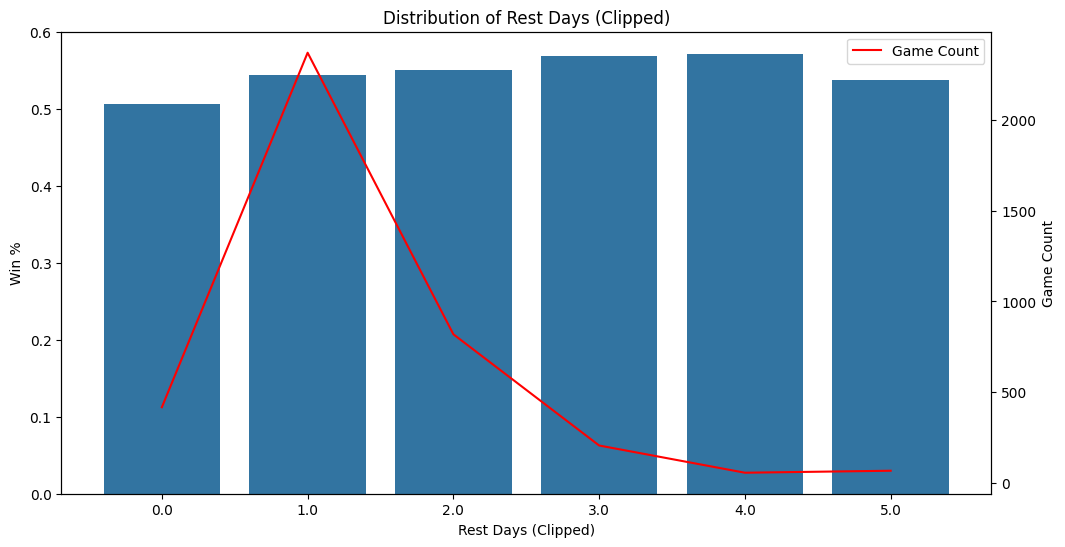

In [338]:
g = df.copy()
g = g[~g['is_away']]
g['rest_clipped'] = g['rest_days'].clip(0,5) # exclude super long breaks (all-star week)
win_pct = g.groupby(['rest_clipped'])['game_result'].apply(lambda s:(s=='win').mean()) # gets the win percentage for each group

counts = g['rest_clipped'].value_counts().sort_index()
display(counts) # counts the number of games in each group
# g = g.sort_values()
display(g)

print(sum(counts))


# plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x=win_pct.index, y=win_pct.values, ax=ax1)
plt.title('Distribution of Rest Days (Clipped)')
plt.xlabel('Rest Days (Clipped)')
plt.ylabel('Win %')
ax2 = ax1.twinx()
sns.lineplot(x=counts.index, y=counts.values, color='red', label='Game Count', ax=ax2)
ax2.set_ylabel('Game Count')
plt.show()


[  15.07215006  448.31643605  881.56072205 1314.80500804 1748.04929404
 2181.29358003 2614.53786603 3047.78215202 3481.02643802 3914.27072401
 4347.51501    4780.759296   5214.00358199 5647.24786799 6080.49215398
 6513.73643998]


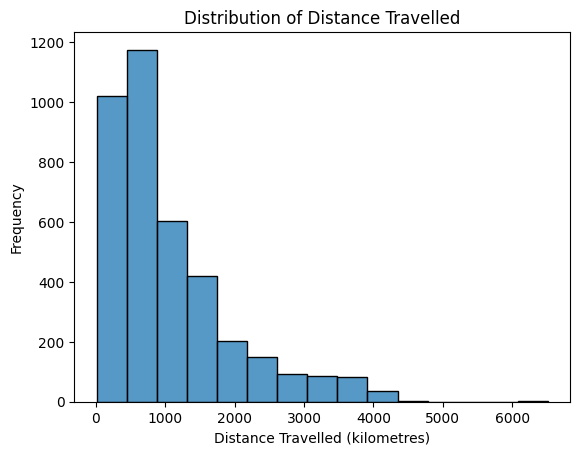

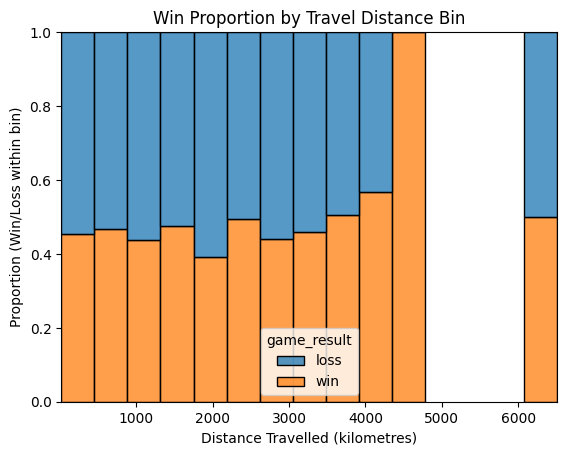

In [339]:
# analyze game wins vs. distance travelled
# get distribution of distance travelled

g = df.copy()
g = g[g['distance'] > 0] # remove rows where they do not travel (home games)
g = g[g['is_away']]
# create histogram of distances travelled
edges = np.histogram_bin_edges(g['distance'], bins=15)
print(edges)
sns.histplot(g['distance'], bins=edges)
plt.title('Distribution of Distance Travelled')
plt.xlabel('Distance Travelled (kilometres)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=g, x='distance', bins=edges, hue='game_result',
multiple='fill', stat='proportion')
plt.xlabel('Distance Travelled (kilometres)')
plt.ylabel('Proportion (Win/Loss within bin)')
plt.title('Win Proportion by Travel Distance Bin')
plt.show()


,dist_bin,mean,count,std,dist_bin_midpoint
0,"[0.0, 250.0)",-0.246696,454,2.729275,125.0
1,"[250.0, 500.0)",-0.347769,762,2.670922,375.0
2,"[500.0, 750.0)",-0.096324,789,2.571979,625.0
3,"[750.0, 1000.0)",-0.370000,500,2.640273,875.0
4,"[1000.0, 1250.0)",-0.337793,299,2.648846,1125.0
5,"[1250.0, 1500.0)",-0.318182,264,2.711245,1375.0
6,"[1500.0, 2000.0)",-0.220339,354,2.578410,1750.0
7,"[2000.0, 3000.0)",-0.216667,300,2.455570,2500.0
8,"[3000.0, 5000.0)",0.047170,212,2.690626,4000.0


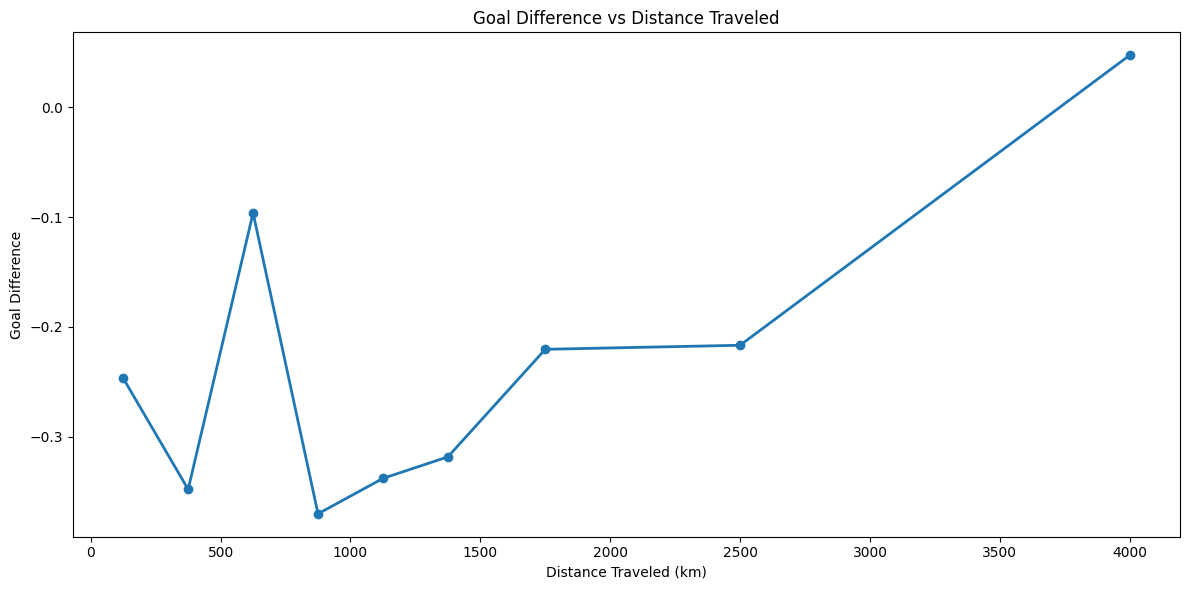

In [340]:
# scatter plot for goal difference and distance traveled
g = df.copy()
g=g[g['is_away']]
# get mean goal difference for each distance
g2 = g.groupby('dist_bin', observed=True)['goal_difference'].agg(['mean','count','std']).reset_index()
g2 = g2[g2['count'] > 5]

# get midpoint from dist_bin
g2['dist_bin_midpoint'] = g2['dist_bin'].apply(lambda x: (x.left + x.right) / 2)

display(g2)

plt.figure(figsize=(12, 6))
plt.plot(g2['dist_bin_midpoint'], g2['mean'], marker='o', label='Mean Goal Difference', linewidth=2)

plt.title('Goal Difference vs Distance Traveled')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Goal Difference')
plt.tight_layout()
plt.show()

,total_km,away_km,home_km,away_share,games,km_per_game
team,,,,,,
DAL,90091.216179,47821.013030,42270.203149,0.530807,82,1098.673368
FLA,82236.209404,50557.357409,31678.851995,0.614782,82,1002.880602
ANA,81436.186861,49745.793136,31690.393725,0.610856,82,993.124230
EDM,80360.990972,51512.810269,28848.180702,0.641018,82,980.012085
UTA,78319.423135,53910.919209,24408.503925,0.688347,82,955.114916
SEA,77495.029213,54502.082618,22992.946595,0.703298,82,945.061332
WPG,76265.260367,48551.009294,27714.251073,0.636607,82,930.064151
VGK,73787.170742,48576.499282,25210.671460,0.658333,82,899.843546
CGY,72626.900914,45204.494647,27422.406267,0.622421,82,885.693914


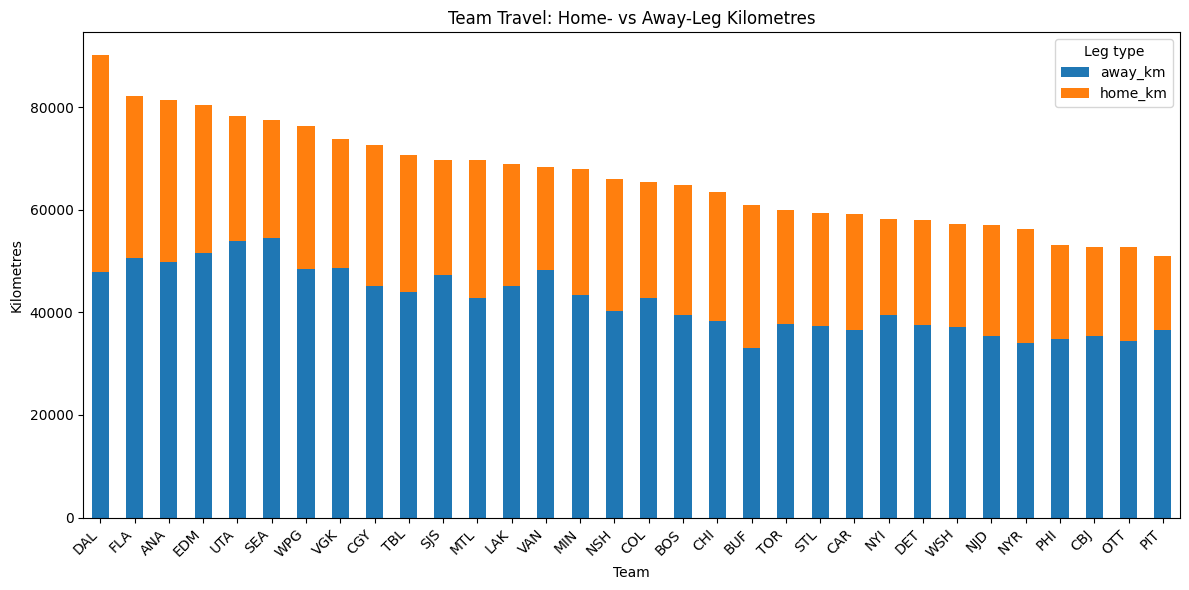

total percent diff:  0.43428036090475497
away percent diff:  0.3928900706618612


In [360]:
g = df.copy()
g = g[g['season'] == 20242025]
# Totals
total_km = g.groupby('team')['distance'].sum().rename('total_km')
away_km  = g[g['is_away']].groupby('team')['distance'].sum().rename('away_km')
home_km  = g[~g['is_away']].groupby('team')['distance'].sum().rename('home_km')

summary = pd.concat([total_km, away_km, home_km], axis=1).fillna(0)
summary['away_share']   = (summary['away_km'] / summary['total_km']).replace([np.inf, np.nan], 0)
summary['games']        = g.groupby('team')['game_id'].nunique()
summary['km_per_game']  = summary['total_km'] / summary['games']

# Sort by total travel (or pick 'away_km' to focus on road legs)
summary = summary.sort_values('total_km', ascending=False)

display(summary)

# Stacked bar: home vs away contributions to total
ax = summary[['away_km', 'home_km']].plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title('Team Travel: Home- vs Away-Leg Kilometres')
ax.set_ylabel('Kilometres')
ax.set_xlabel('Team')
ax.legend(title='Leg type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print('total percent diff: ', (max(summary['total_km']) - min(summary['total_km'])) / max(summary['total_km']))
print('away percent diff: ', (max(summary['away_km']) - min(summary['away_km'])) / max(summary['away_km']))

### Statistical test to determine if there is a cause and effect

In [342]:
g = df.copy()
g = g[g['is_away']]

long_haul = g[g['distance'] > 3000]
display(long_haul)


,Unnamed: 0,game_id,season,game_date,game_type,venue,venue_utc_offest,home_team_id,away_team_id,home_team_abbrev,...,game_result,goal_difference,venue_lat_prev,venue_lon_prev,distance,consecutive_away_games,rest_days,back_to_back,dist_bin,dist_bin_midpoint
1,9185,2022020032,20222023,2022-10-15,2,UBS Arena,-04:00,2,24,NYI,...,loss,-6.0,33.807778,-117.876667,3939.487266,1,2.0,False,"[3000.0, 5000.0)",4000.0
28,9212,2022020451,20222023,2022-12-12,2,Canadian Tire Centre,-05:00,9,24,OTT,...,loss,-3.0,33.807778,-117.876667,3767.642334,1,2.0,False,"[3000.0, 5000.0)",4000.0
43,9227,2022020700,20222023,2023-01-16,2,PPG Paints Arena,-05:00,5,24,PIT,...,loss,-1.0,33.807778,-117.876667,3411.702902,1,2.0,False,"[3000.0, 5000.0)",4000.0
47,9231,2022020763,20222023,2023-01-24,2,Mullett Arena,-07:00,53,24,ARI,...,win,3.0,42.875000,-78.876389,3072.660958,5,2.0,False,"[3000.0, 5000.0)",4000.0
56,9240,2022020902,20222023,2023-02-20,2,FLA Live Arena,-05:00,13,24,FLA,...,loss,-1.0,33.807778,-117.876667,3693.846337,1,2.0,False,"[3000.0, 5000.0)",4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,6523,2024020301,20242025,2024-11-20,2,Scotiabank Arena,-05:00,10,54,TOR,...,loss,-3.0,36.102778,-115.178333,3141.269923,1,2.0,False,"[3000.0, 5000.0)",4000.0
7678,6343,2024020839,20242025,2025-02-02,2,Madison Square Garden,-05:00,3,54,NYR,...,loss,-2.0,36.102778,-115.178333,3591.406513,1,2.0,False,"[3000.0, 5000.0)",4000.0
7689,6433,2024021028,20242025,2025-03-11,2,PPG Paints Arena,-04:00,5,54,PIT,...,loss,-1.0,36.102778,-115.178333,3088.767668,1,1.0,False,"[3000.0, 5000.0)",4000.0
7836,5983,2024020754,20242025,2025-01-21,2,Rogers Place,-07:00,22,15,EDM,...,win,1.0,38.898200,-77.020900,3194.483563,1,2.0,False,"[3000.0, 5000.0)",4000.0


In [343]:
# perform a quick statistical test to determine whether or not distance traveled determines game result

# chi2 or other?

from scipy import stats

/var/folders/_z/1h8m2g3x1cgc41srwzsqjr900000gn/T/ipykernel_42461/2813111528.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = g.groupby(['consec_bin', 'dist_class'])['game_result'].apply(lambda s: (s == 'win').mean()).reset_index()


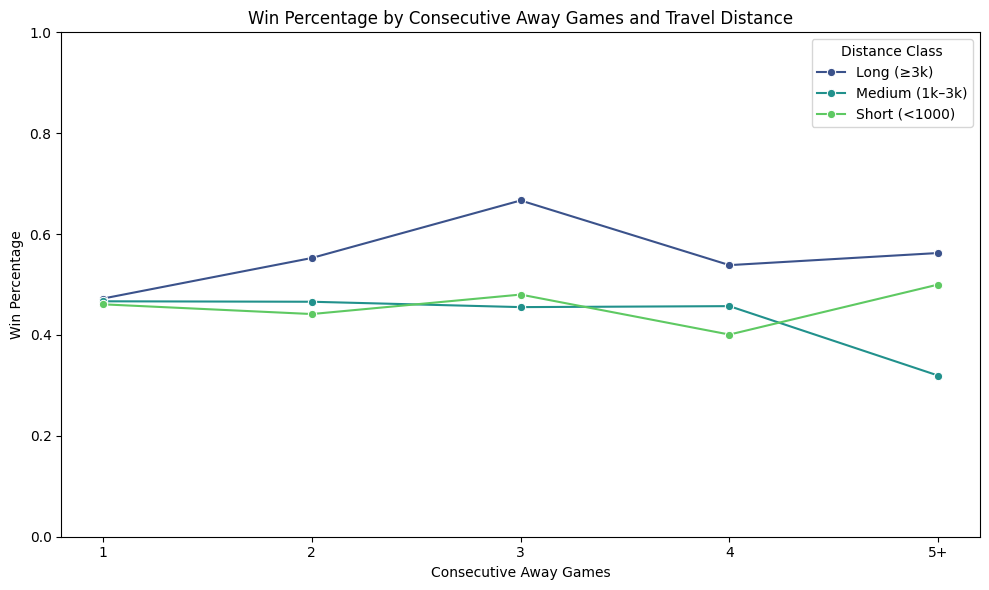

In [344]:
g = df.copy()
g = g[g['is_away']]
def dist_class(d):
    if pd.isna(d): return np.nan
    if d < 1000: return "Short (<1000)"
    if d < 3000: return "Medium (1k–3k)"
    return "Long (≥3k)"
g['dist_class'] = g['distance'].apply(dist_class)
g['consec_bin'] = pd.cut(
    g['consecutive_away_games'],
    bins=[0, 1, 2, 3, 4, np.inf],
    labels=['1', '2', '3', '4', '5+'],
)
grouped = g.groupby(['consec_bin', 'dist_class'])['game_result'].apply(lambda s: (s == 'win').mean()).reset_index()

# Plot the triple line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='consec_bin', y='game_result', hue='dist_class', marker='o', palette='viridis')

# Add labels and title
plt.title('Win Percentage by Consecutive Away Games and Travel Distance')
plt.xlabel('Consecutive Away Games')
plt.ylabel('Win Percentage')
plt.legend(title='Distance Class')
plt.ylim(0, 1)
plt.tight_layout()

# Show the plot
plt.show()

### Which teams played better while traveling

,team,season,travel_win_rate
5,BOS,20222023,0.756098
23,COL,20222023,0.707317
47,NJD,20222023,0.682927
32,EDM,20222023,0.658537
87,VGK,20222023,0.634146
...,...,...,...
14,CBJ,20222023,0.219512
73,SJS,20242025,0.195122
72,SJS,20232024,0.195122
3,ARI,20222023,0.170732


,team,season,travel_win_rate,home_win_rate,travel_diff
7,NJD,20222023,0.682927,0.414634,0.268293
2,BOS,20222023,0.756098,0.487805,0.268293
22,SEA,20222023,0.634146,0.414634,0.219512
8,NJD,20222023,0.682927,0.463415,0.219512
27,BUF,20222023,0.609756,0.414634,0.195122
...,...,...,...,...,...
280,ARI,20222023,0.170732,0.536585,-0.365854
207,CAR,20242025,0.390244,0.756098,-0.365854
266,CBJ,20232024,0.243902,0.634146,-0.390244
272,CBJ,20222023,0.219512,0.634146,-0.414634


/var/folders/_z/1h8m2g3x1cgc41srwzsqjr900000gn/T/ipykernel_42461/3232831094.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=comparison, x='team', y='travel_diff', hue='season', palette='coolwarm', dodge=True, ci=None)


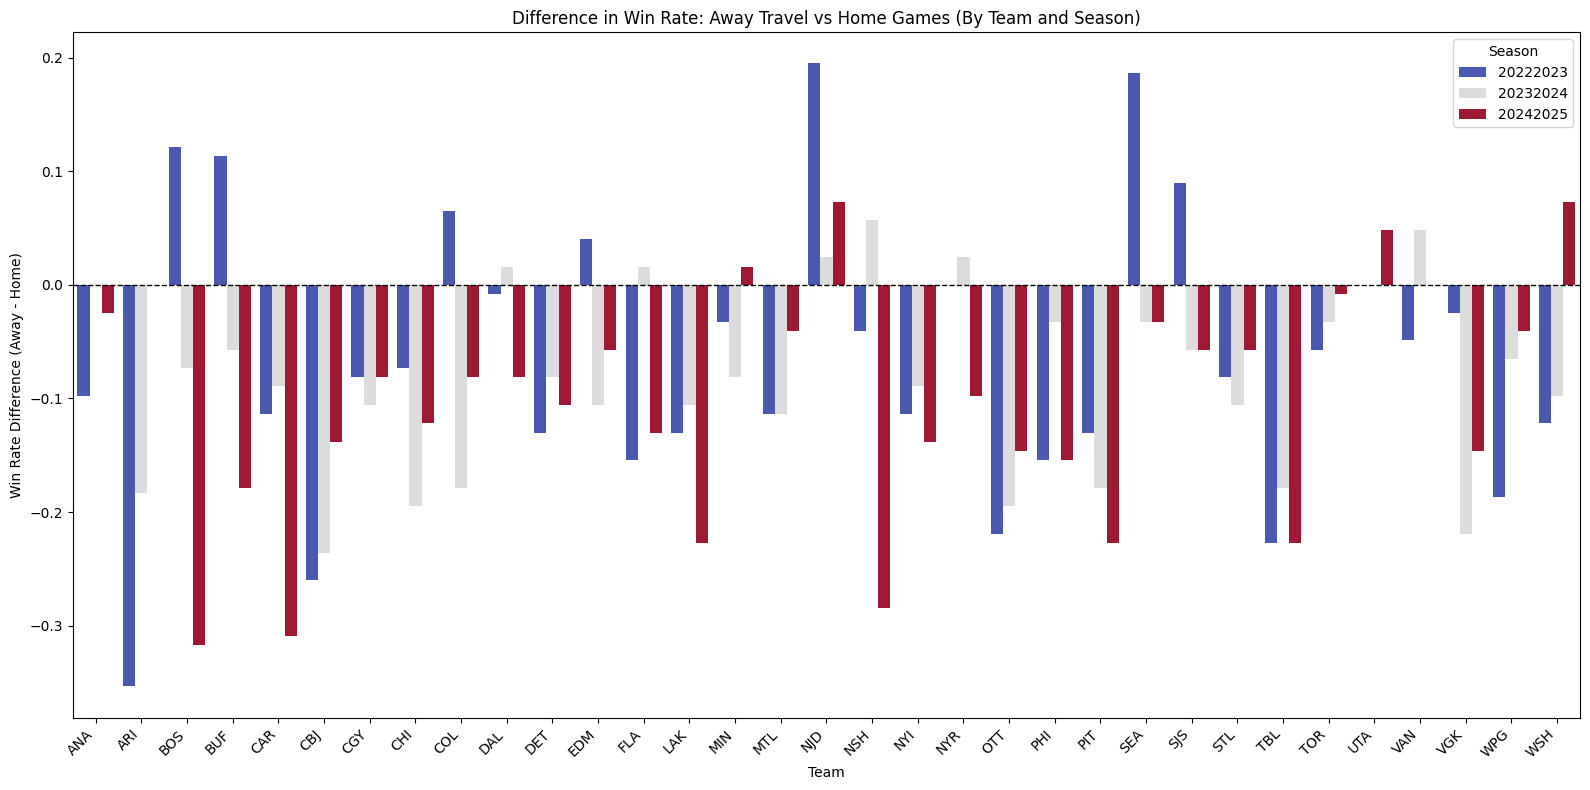

In [345]:
g = df.copy()
# Filter for away games with travel > 0 km (or whatever your threshold is)
travel_games = g[g['is_away']]

# Group by team and calculate win rate
travel_performance = (
    travel_games
    .groupby(['team', 'season'])['game_result']
    .apply(lambda s: (s == 'win').mean())
    .reset_index(name='travel_win_rate')
    .sort_values('travel_win_rate', ascending=False)
)

display(travel_performance)

home_win_rate = (
    g[~g['is_away']]
    .groupby(['team', 'season'])['game_result']
    .apply(lambda s: (s == 'win').mean())
    .rename('home_win_rate')
)

comparison = travel_performance.merge(home_win_rate, on='team')
comparison['travel_diff'] = comparison['travel_win_rate'] - comparison['home_win_rate']
comparison = comparison.sort_values('travel_diff', ascending=False)

display(comparison)

comparison = comparison.sort_values(['team', 'season', 'travel_diff'], ascending=[True, True, False])

# Plot the comparison
plt.figure(figsize=(16, 8))
sns.barplot(data=comparison, x='team', y='travel_diff', hue='season', palette='coolwarm', dodge=True, ci=None)
plt.title('Difference in Win Rate: Away Travel vs Home Games (By Team and Season)')
plt.xlabel('Team')
plt.ylabel('Win Rate Difference (Away - Home)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(title='Season', loc='upper right')
plt.tight_layout()
plt.show()


,team,season,travel_win_rate,home_win_rate,travel_diff
0,ANA,20222023,0.268293,0.292683,-0.024390
1,ANA,20232024,0.365854,0.292683,0.073171
2,ANA,20242025,0.341463,0.512195,-0.170732
3,ARI,20222023,0.170732,0.512195,-0.341463
4,ARI,20232024,0.341463,0.536585,-0.195122
...,...,...,...,...,...
91,WPG,20232024,0.609756,0.658537,-0.048780
92,WPG,20242025,0.634146,0.731707,-0.097561
93,WSH,20222023,0.414634,0.439024,-0.024390
94,WSH,20232024,0.439024,0.536585,-0.097561


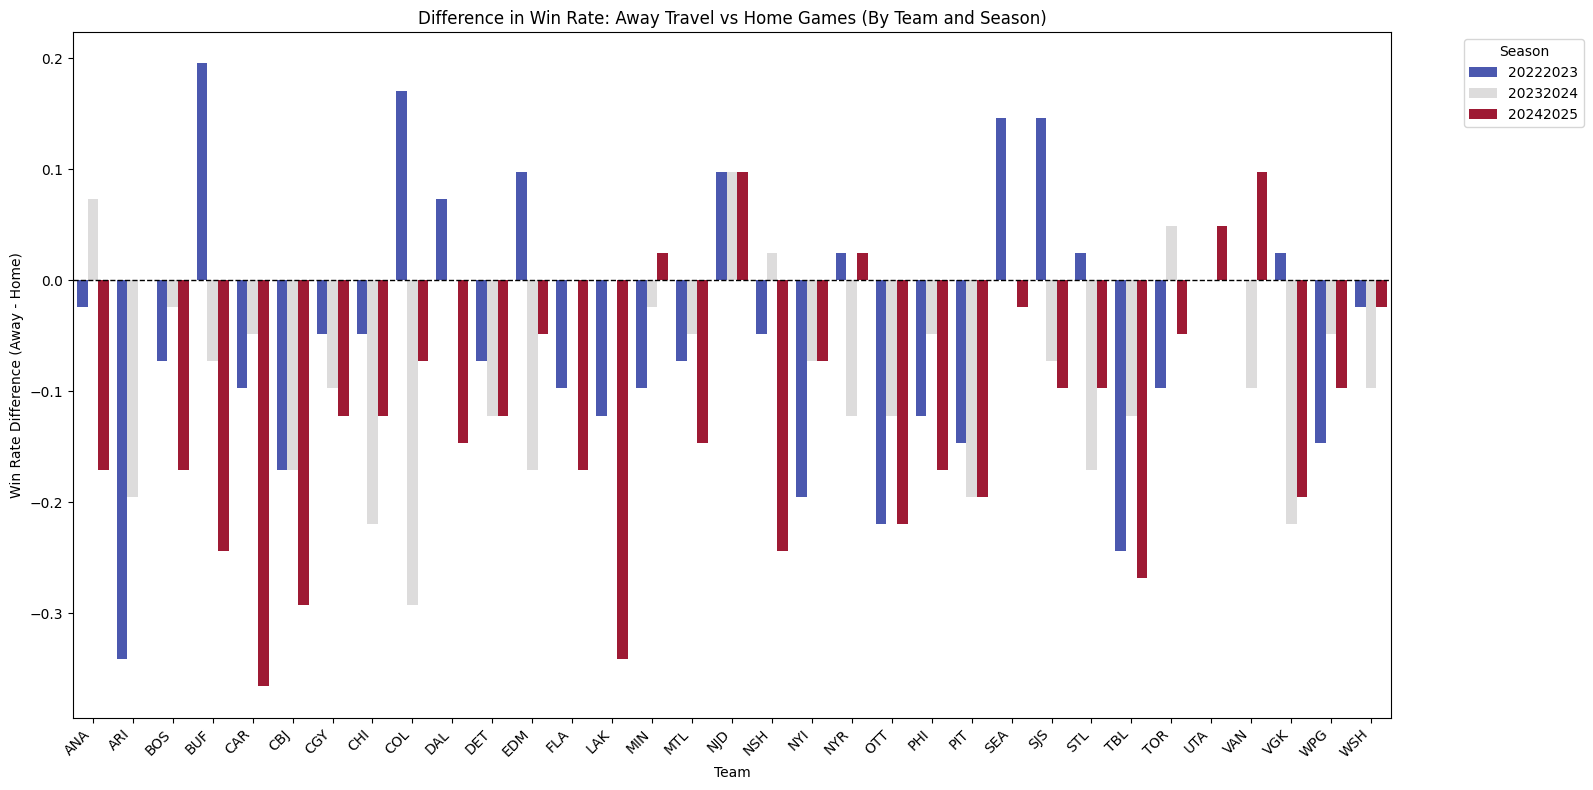

In [346]:
g = df.copy()

# Filter for away games with travel > 0 km (or whatever your threshold is)
travel_games = g[g['is_away']]

# Group by team and season, calculate win rate for away games
travel_performance = (
    travel_games
    .groupby(['team', 'season'])['game_result']
    .apply(lambda s: (s == 'win').mean())
    .reset_index(name='travel_win_rate')
)

# Group by team and season, calculate win rate for home games
home_win_rate = (
    g[~g['is_away']]
    .groupby(['team', 'season'])['game_result']
    .apply(lambda s: (s == 'win').mean())
    .reset_index(name='home_win_rate')
)

# Merge travel and home win rates
comparison = travel_performance.merge(home_win_rate, on=['team', 'season'])
comparison['travel_diff'] = comparison['travel_win_rate'] - comparison['home_win_rate']

# Sort by team and season
comparison = comparison.sort_values(['team', 'season', 'travel_diff'], ascending=[True, True, False])

# Display the comparison DataFrame
display(comparison)

# Plot the comparison
plt.figure(figsize=(16, 8))
sns.barplot(data=comparison, x='team', y='travel_diff', hue='season', palette='coolwarm', dodge=True)
plt.title('Difference in Win Rate: Away Travel vs Home Games (By Team and Season)')
plt.xlabel('Team')
plt.ylabel('Win Rate Difference (Away - Home)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [357]:
from scipy import stats

g = df.copy()
g = g[g['is_away']]
# Encode win as 1, loss as 0
g['win_flag'] = (g['game_result'] == 'win').astype(int)

# Point-biserial correlation
corr, p_value = stats.pointbiserialr(g['win_flag'], g['distance'])
print(f"Correlation: {corr:.4f}, p-value: {p_value:.4f}")


Correlation: 0.0120, p-value: 0.4535
